Please perform the following exercises, each of which is worth $10$ points.  The instructions for most can be found at the end of the Chapter notes, however several include additional information / starter code which is provided below.

 - **Chapter 7:** Exercises: 2, 3, and 5
 
 - **Chapter 8:** Exercises: 1, 2, and 4

Note: in completing Exercises $3$ and $5$ of Chapter 7 and Exercise 5 of Chapter 8 you may want to *flatten* your cost function prior to minimizing it since both the multi-class model and the Linear Autoencoder take in a **matrix** of weights.  You can find instructinos about how to do this via `autograd` in the attached Jupyter notebook called `flattening_functions_using_autograd.ipynb`.

In [2]:
# import autograd / numpy necessities
from autograd import numpy as np
import math
import matplotlib.pyplot as plt
from autograd import grad 

# set path to datasets
datapath = 'datasets/'

# Chapter 7 Exercise 2

In [29]:
# location of dataset
import math 
from mpl_toolkits.mplot3d import Axes3D

csvname = datapath + '4class_data.csv'
data = np.loadtxt(csvname,delimiter = ',')
w=np.array([3.0,3.0,3.0])
# get input/output pairs
x = data[:-1,:]
y = data[-1:,:]
yp=y
mis=0
# gradient descent function 
# g = variables(NDArray or list of NDArray) – Input variables to compute gradients for.
# alpha, 学习速率，自定
# w = [theta0, theta1]，待求的权值，取the last one
# max_its，最大迭代次数，自定
def gradient_descent(g,alpha,max_its,w):
    # compute gradient module using autograd
    gradient = grad(g)

    # run the gradient descent loop
    weight_history = [w] # weight history container
    cost_history = [g(w)] # cost function history container
    for k in range(max_its):
        # evaluate the gradient
        grad_eval = gradient(w)

        # take gradient descent step
        w = w - alpha*grad_eval
        
        # record weight and cost
        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history,cost_history
    #h(x) = theta0 + theta1*x

def model(x,w):
    a = w[0] + np.dot(x.T,w[1:])
    return a.T

def fusion_rule(x,w):
    return np.argmax(model(x,w))

def softmax(w):
    global yp
    cost = np.sum(np.log(1 + np.exp(-yp*model(x,w)))) 
    return cost/float(np.size(yp))

def label(y,c):
    y2=np.random.randint(0, 1, (1, 40))
    for i in range(0,len(y[0])):
        if y[0][i]== c:
            y2[0][i]=1
        else:
            y2[0][i]=-1
    return y2

w_his={}
c_his={}

for i in range(0,4):
    yp=label(y,i)
    temp,c_his[i]=gradient_descent(softmax,0.02,1900,w)
    w_his[i]=temp[-1]

w_his=np.array([w_his[0],w_his[1],w_his[2],w_his[3]])

y_predicted=[]
for i in range(0,40):
    y_predicted.append(fusion_rule(x[:,i],w_his.T))
#print(y_predicted)


for i in range(0,40):
    if y_predicted[i]!=y[0][i]:
        mis+=1
print("the number of misclassification is:", mis)

the number of misclassification is: 9


In [30]:
print (y)

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  3.  3.  3.  3.  3.  3.
   3.  3.  3.  3.]]


# Chapter 7 Exercise 3 and 5

In [31]:
# location of dataset

from autograd.misc.flatten import flatten_func
csvname = datapath + '3class_data.csv'
data = np.loadtxt(csvname,delimiter = ',')

# get input/output pairs
x = data[:-1,:]
y = data[-1:,:] 
w=np.array([[2.0,2.0,2.0],[2.0,2.0,2.0],[2.0,2.0,2.0]])

def model(x,w):
    a = w[0] + np.dot(x.T,w[1:])
    return a.T

def gradient_descent(g,alpha,max_its,w):
    # compute gradient module using autograd
    gradient = grad(g)

    # run the gradient descent loop
    weight_history = [w] # weight history container
    cost_history = [g(w)] # cost function history container
    for k in range(max_its):
        # evaluate the gradient
        grad_eval = gradient(w)

        # take gradient descent step
        w = w - alpha*grad_eval
        
        # record weight and cost
        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history,cost_history
    #h(x) = theta0 + theta1*x

def fusion_rule(x,w):
    return np.argmax(model(x,w))

lam = 10**-5  # our regularization paramter 
def multiclass_perceptron(w):        
    # pre-compute predictions on all points
    all_evals = model(x,w)
    # compute maximum across data points
    a = np.max(all_evals,axis = 0)    
    # compute cost in compact form using numpy broadcasting
    b = all_evals[y.astype(int).flatten(),np.arange(np.size(y))]
    cost = np.sum(a - b)
    # return average
    return cost/float(np.size(y))


w_his,c_his=gradient_descent(multiclass_perceptron,0.1,1000,w)
ans=[]

for i in range(0,30):
    ans.append(fusion_rule(x[:,i],w_his[-1]))
print(ans)

misnum=0
for i in range(0,30):
    if ans[i]!=y[0][i]:
        misnum+=1
print("the number of misclassification is:", misnum)



#Exercise5
csvname = datapath + '4class_data.csv'
data = np.loadtxt(csvname,delimiter = ',')
w=np.array([[2.0,1.0,1.0,3.0],[2.0,1.0,1.0,3.0],[2.0,1.0,1.0,3.0]])

# get input/output pairs
x = data[:-1,:]
y = data[-1:,:] 

def fusion_rule(x,w):
    return np.argmax(model(x,w))

lam = 10**(-5)  # our regularization paramter 
def multiclass_softmax(w):        
    # pre-compute predictions on all points
    all_evals = model(x,w)
    
    # compute softmax across data points
    a = np.log(np.sum(np.exp(all_evals),axis = 0)) 
    
    # compute cost in compact form using numpy broadcasting
    b = all_evals[y.astype(int).flatten(),np.arange(np.size(y))]
    cost = np.sum(a - b)
    
    # add regularizer
    cost = cost + lam*np.linalg.norm(w[1:,:],'fro')**2
    
    # return average
    return cost/float(np.size(y))


w_his,c_his=gradient_descent(multiclass_softmax,0.1,1000,w)
ans=[]

print("Excercise 5")
for i in range(0,40):
    ans.append(fusion_rule(x[:,i],w_his[-1]))
print(ans)

mis=0
for i in range(0,40):
    if ans[i]!=y[0][i]:
        mis+=1
print("the number of misclassification is:", mis)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
the number of misclassification is: 0
Excercise 5
[0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 3, 1, 0, 1, 2, 2, 2, 2, 2, 2, 2, 3, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3]
the number of misclassification is: 9


In [32]:
print (y)

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  3.  3.  3.  3.  3.  3.
   3.  3.  3.  3.]]


# Chapter 8 Exercise 1

The Formula after simplified is W_p=X_p
If we use the standard basis vectors as the basis, which was denoted as $C$ in the above chapters. We could easily calculate that $C = C^T = I_{N*N}$.
In such case, $w_p = C^Tx_p  (p = 1,2,...,P)$ could be formulated as $w_p = x_p   (p = 1,2,...,P)$

# Chapter 8 Exercise 2 and 4

In [33]:
import matplotlib.pyplot as plt
import numpy as np1

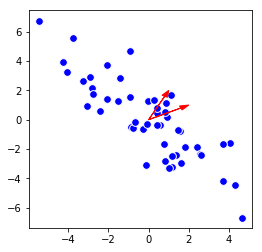

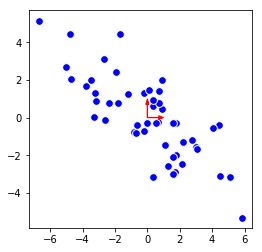

In [34]:
#Exercise 2
datapath = 'datasets/'
csvname = datapath + '2d_span_data_centered.csv'
# load in dataset
X = np.loadtxt(csvname,delimiter = ',')
figure = plt.figure(figsize = (4,4))
plt.scatter(X[0,:],X[1,:],s=60,c='b',edgecolor='w')
plt.arrow(0, 0, 1, 2, length_includes_head=True, head_width=0.3,color='r')
plt.arrow(0, 0, 2, 1, length_includes_head=True, head_width=0.3,color='r')
plt.show()

def square_cost(w):
    encoder = np.dot(w.T,X)
    decoder = np.dot(w,encoder)
    cost = np.sum(np.square(decoder - X))
    return cost / float(X.shape[1])

def gradient_descent(g,alpha,max_its,w):
    # compute gradient module using autograd
    gradient = grad(g)

    # run the gradient descent loop
    weight_history = [w] # weight history container
    cost_history = [g(w)] # cost function history container
    for k in range(max_its):
        # evaluate the gradient
        grad_eval = gradient(w)

        # take gradient descent step
        w = w - alpha*grad_eval
        
        # record weight and cost
        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history,cost_history
    #h(x) = theta0 + theta1*x

w_his,c_his = gradient_descent(square_cost,0.001,100,np.random.rand(2,2))

w = w_his[-1]
encoder = np.dot(X.T,w).T
# plot dataset
figure = plt.figure(figsize = (4,4))
plt.scatter(encoder[0],encoder[1],s=60,c='b',edgecolor='w')
plt.arrow(0, 0, 1, 0, length_includes_head=True, head_width=0.2,color='r')
plt.arrow(0, 0, 0, 1, length_includes_head=True, head_width=0.2,color='r')  
plt.show()  

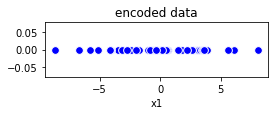

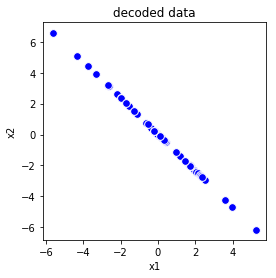

In [4]:
#Exercise 4
datapath = 'datasets/'
csvname = datapath + '2d_span_data_centered.csv'
# load in dataset
X = np.loadtxt(csvname,delimiter = ',')

def square_cost(w):
    encoder = np.dot(w.T,X)
    decoder = np.dot(w,encoder)
    cost = np.sum(np.square(decoder - X))
    return cost / float(X.shape[1])

def gradient_descent(g,alpha,max_its,w):
    # compute gradient module using autograd
    gradient = grad(g)

    # run the gradient descent loop
    weight_history = [w] # weight history container
    cost_history = [g(w)] # cost function history container
    for k in range(max_its):
        # evaluate the gradient
        grad_eval = gradient(w)

        # take gradient descent step
        w = w - alpha*grad_eval
        
        # record weight and cost
        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history,cost_history
    #h(x) = theta0 + theta1*x

w_his,c_his = gradient_descent(square_cost,0.01,1000,np.array([[-1],[-1]]))
w = w_his[-1]
encoder = np.dot(w.T,X)
decoder = np.dot(w,encoder)


figure = plt.figure(figsize = (4,1))
plt.scatter(encoder[0],[0 for i in range(50)],s=60,c='b',edgecolor='w')
plt.title('encoded data')
plt.xlabel('x1')
plt.show()


figure = plt.figure(figsize = (4,4))
plt.scatter(decoder[0],decoder[1],s=60,c='b',edgecolor='w')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('decoded data')
plt.show()

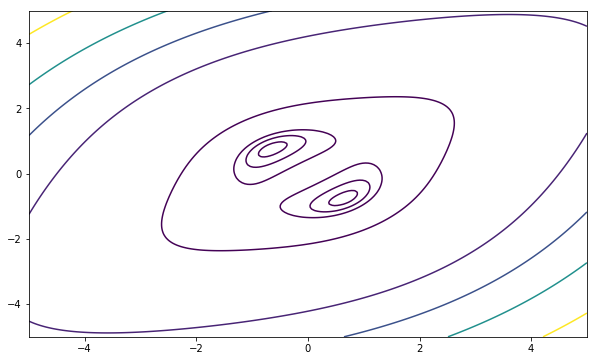

From the pic we can see there are two global minimaa.


In [7]:
from mpl_toolkits.mplot3d import Axes3D
def fun(C):
    return np.sum((np.dot(np.dot(C,C.T),X) - X)**2)/float(len(X[0]))


c_0 = np.linspace(-5,5,200)
c_1 = np.linspace(-5,5,200)
c0,c1 = np.meshgrid(c_0,c_1)

result = np.zeros(shape=(c0.shape[0],c0.shape[1]))
for i in range(c0.shape[0]):
    for j in range(c0.shape[1]):
        c = np.array([[c0[i][j]], [c1[i][j]]])
        result[i][j] = fun(c)

plt.figure(figsize = (10,6))
plt.contour(c0,c1,result,[1,2,5,10,100,2000,5000,10000,20000])
plt.show()
print('From the pic we can see there are two global minimaa.')